<a href="https://colab.research.google.com/github/Sk-Shakeel07/Deep-Learning-repo/blob/main/Lab_Assignment_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CSE 2794 – Machine Learning Workshop 2
#LAB ASSIGNMENT-7: TIME SERIES FORECASTING USING  AR, MA, ARMA, ARIMA, AND SARIMA MODELS
#Name: SK SHAKEEL AKHTAR
#Reg. No.: 2341001063
#Section: 23412C3

In [ ]:
import pandas as pd
import statsmodels.api as sm #ar ma arma arina sarima
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter('ignore')
from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
import warnings
warnings.simplefilter('ignore')

# Dataset
* Download any public time series data set (e.g., stock prices, weather data, or sale data).  
* You may use data from Kaggle or other open datasets. (You are suggested to use the same dataset as Lab



In [ ]:
series = pd.read_csv('https://raw.githubusercontent.com/M3GHAN/stock-price-prediction-ARIMA-SARIMA/refs/heads/main/NSE-TATAGLOBAL.csv')
series.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


# Data Collection and Preparation
* Load the dataset in Python using libraries such as pandas.  
* Handle missing values (if any) and perform data pre-processing (e.g., setting the time index).

In [ ]:
# Check for missing values
print("Missing values before handling:")
print(series.isnull().sum())

# The 'Date' column seems like a good candidate for the time index
# Convert 'Date' to datetime objects and set it as the index
series['Date'] = pd.to_datetime(series['Date'])
series.set_index('Date', inplace=True)

# Sort the index in ascending order to ensure correct time series order
series.sort_index(inplace=True)

print("\nData after setting time index and sorting:")
print(series.head())

Missing values before handling:
Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

Data after setting time index and sorting:
             Open    High     Low    Last   Close  Total Trade Quantity  \
Date                                                                      
2010-07-21  122.1  123.00  121.05  121.10  121.55                658666   
2010-07-22  120.3  122.00  120.25  120.75  120.90                293312   
2010-07-23  121.8  121.95  120.25  120.35  120.65                281312   
2010-07-26  120.1  121.00  117.10  117.10  117.60                658440   
2010-07-27  117.6  119.50  112.00  118.80  118.65                586100   

            Turnover (Lacs)  
Date                         
2010-07-21           803.56  
2010-07-22           355.17  
2010-07-23           340.31  
2010-07-26           780.01

# Exploratory Data Analysis (EDA)
* Plot the time series data to visualize trends, seasonality, and noise.

* Perform stationarity tests using the Augmented Dickey-Fuller (ADF) test.


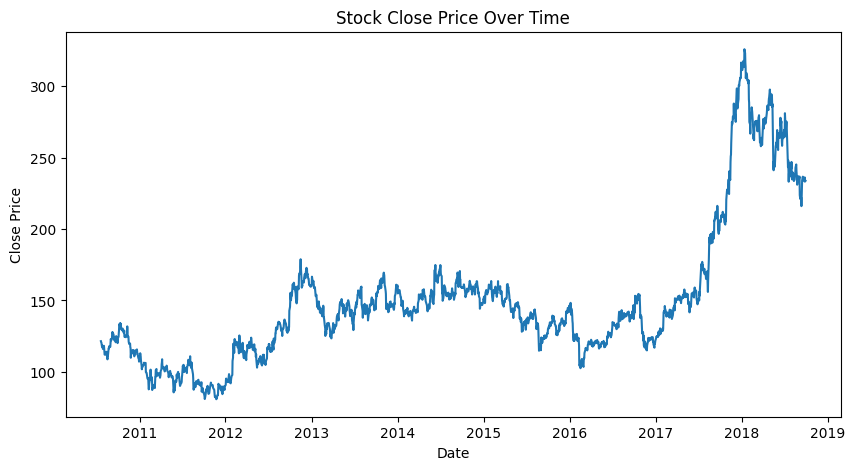


Augmented Dickey-Fuller Test:
ADF Statistic: -0.9013584739538786
P-value: 0.7875247234994129
The series is likely non-stationary.


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Plot the 'Close' price EDA
plt.figure(figsize=(10, 5))
plt.plot(series['Close'])
plt.title('Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

# Perform Augmented Dickey-Fuller test
print("\nAugmented Dickey-Fuller Test:")
adf_test = adfuller(series['Close'])
print(f'ADF Statistic: {adf_test[0]}')
print(f'P-value: {adf_test[1]}')

if adf_test[1] > 0.05:
    print("The series is likely non-stationary.")
else:
    print("The series is likely stationary.")

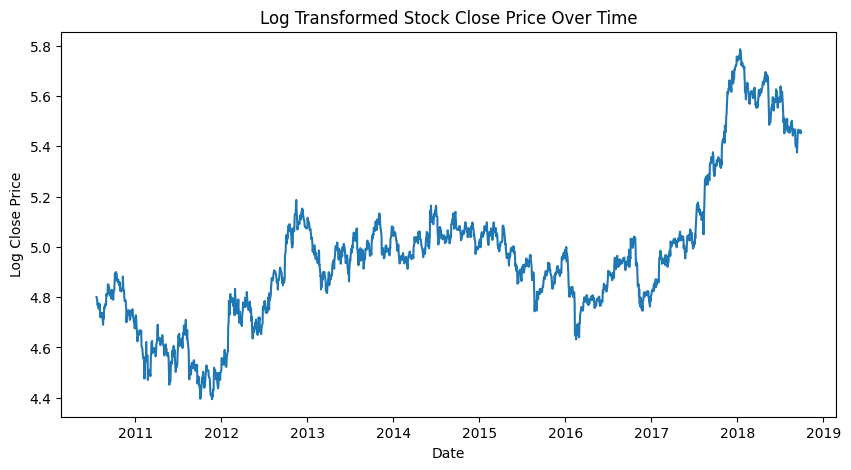

In [ ]:
# @title Apply transformations (e.g., differencing or log transformation) to make the series stationary, if necessary.
# Apply transformations if necessary
# Option 1: Log Transformation
series['Close_log'] = np.log(series['Close'])
plt.figure(figsize=(10, 5))
plt.plot(series['Close_log'])
plt.title('Log Transformed Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Log Close Price')
plt.show()

series['Close_diff1'] = series['Close'].diff()

In [ ]:
# Split the data into training and testing sets
train_size = int(len(series) * 0.8)
train_data, test_data = series['Close'][0:train_size], series['Close'][train_size:]

print(f"\nTraining data size: {len(train_data)}")
print(f"Testing data size: {len(test_data)}")


Training data size: 1628
Testing data size: 407


# Model Implementation
 a) AR Model:
 *  Use the Autoregressive (AR) model to forecast the data.
 * Identify the lag parameter p using the Partial Autocorrelation Function (PACF).

In [ ]:
chosen_p = 5 # *** REPLACE WITH THE LAG YOU IDENTIFY FROM THE PACF PLOT ***

#rint(f"\nChosen lag parameter (p) for AR model based on PACF: {chosen_p}")

# Fit the AR model
# We will fit the AR model on the training data using the chosen lag 'p'.
# Note: AutoReg from statsmodels is suitable for AR models.

# Handle potential NaNs or infinite values in the training data before fitting
cleaned_train_data = train_data.dropna().replace([np.inf, -np.inf], np.nan).dropna()

if len(cleaned_train_data) > chosen_p: # Ensure enough data points for the chosen lag
    ar_model = AutoReg(cleaned_train_data, lags=chosen_p)
    ar_model_fit = ar_model.fit()

    print("\nAR Model Summary:")
    print(ar_model_fit.summary())


else:
    print(f"\nNot enough clean data points ({len(cleaned_train_data)}) to fit AR model with lag {chosen_p}. Need at least {chosen_p + 1} points.")


AR Model Summary:
                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                 1628
Model:                     AutoReg(5)   Log Likelihood               -3856.833
Method:               Conditional MLE   S.D. of innovations              2.605
Date:                Sat, 17 May 2025   AIC                           7727.667
Time:                        13:42:27   BIC                           7765.411
Sample:                             5   HQIC                          7741.673
                                 1628                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9246      0.391      2.368      0.018       0.159       1.690
Close.L1       0.9794      0.025     39.516      0.000       0.931       1.028
Close.L2       0.0324      0.035 

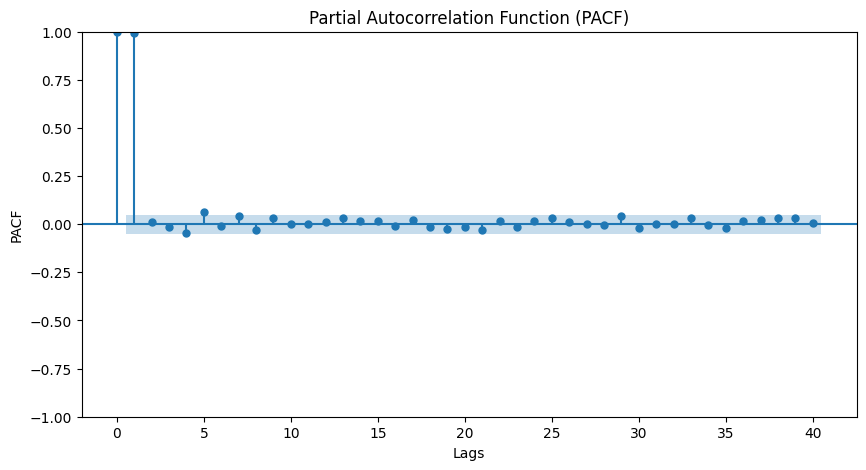

In [ ]:
# Identify the lag parameter p using PACF
plt.figure(figsize=(10, 5))
plot_pacf(train_data, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.show()

b) MA Model:
 * Implement the Moving Average (MA) model.
 * Determine the lag parameter q using the Autocorrelation Function (ACF).

In [ ]:
# @title Implement the Moving Average (MA) model
# The MA model is typically part of the ARIMA framework in statsmodels.
# We'll use the ARIMA model with p=0, d=0 to implement a pure MA(q) model.

# Handle potential NaNs or infinite values in the training data before fitting
cleaned_train_data = train_data.dropna().replace([np.inf, -np.inf], np.nan).dropna()

if len(cleaned_train_data) > chosen_q: # Ensure enough data points for the chosen lag
    # Fit the MA model (ARIMA with p=0, d=0)
    ma_model = ARIMA(cleaned_train_data, order=(0, 0, chosen_q))
    ma_model_fit = ma_model.fit()

    print("\nMA Model Summary:")
    print(ma_model_fit.summary())

    # Note: For forecasting with the MA model, you would use ma_model_fit.forecast()
    # For example, to forecast the next 10 steps:
    # ma_forecast = ma_model_fit.forecast(steps=len(test_data))
    # print("\nMA Model Forecast (first 10 steps):")
    # print(ma_forecast.head(10))


else:
    print(f"\nNot enough clean data points ({len(cleaned_train_data)}) to fit MA model with lag {chosen_q}. Need at least {chosen_q + 1} points.")


MA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1628
Model:                 ARIMA(0, 0, 5)   Log Likelihood               -4683.575
Date:                Sat, 17 May 2025   AIC                           9381.151
Time:                        13:42:32   BIC                           9418.916
Sample:                             0   HQIC                          9395.162
                               - 1628                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        130.9389      0.813    161.115      0.000     129.346     132.532
ma.L1          1.5608      0.022     72.138      0.000       1.518       1.603
ma.L2          1.8048      0.035 

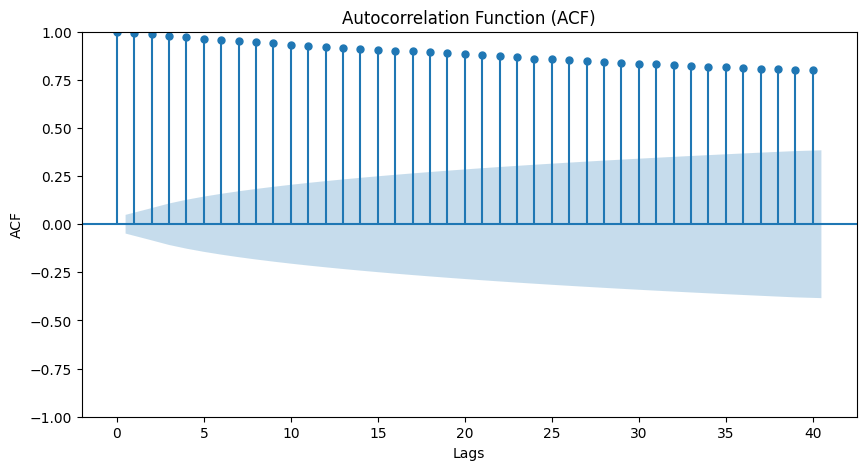

In [ ]:
# Determine the lag parameter q using ACF
plt.figure(figsize=(10, 5))
plot_acf(train_data, lags=40, ax=plt.gca()) # Plot ACF for the training data
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()


#c) ARMA Model:
* Fit an Autoregressive Moving Average (ARMA) model to the stationary data.
* Select appropriate values for p and q using both ACF and PACF plots.

In [ ]:
# Fit an ARMA(p, q) model (choose p and q based on ACF/PACF)
# Example with p=5, q=5, adjust based on your plots
arma_model = ARIMA(train_data, order=(5, 0, 5))
arma_model_fit = arma_model.fit()

print("\nARMA Model Summary:")
print(arma_model_fit.summary())


ARMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1628
Model:                 ARIMA(5, 0, 5)   Log Likelihood               -3865.703
Date:                Sat, 17 May 2025   AIC                           7755.406
Time:                        13:42:39   BIC                           7820.147
Sample:                             0   HQIC                          7779.426
                               - 1628                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        130.9339     11.007     11.895      0.000     109.360     152.507
ar.L1          0.2880      0.333      0.865      0.387      -0.364       0.940
ar.L2          1.6150      0.28

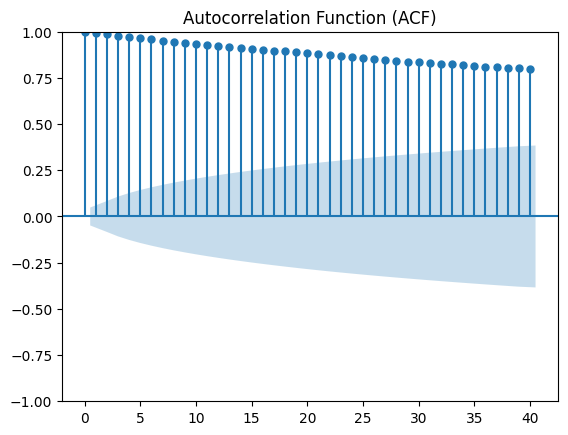

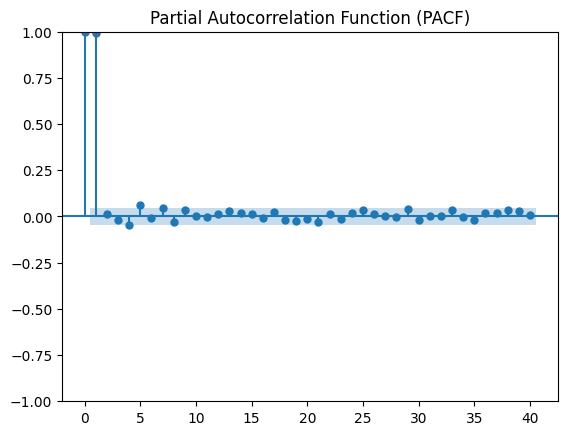

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot ACF and PACF for the original series (if stationary) or differenced series
# Using the original 'Close' series for illustration, replace with differenced if needed
plot_acf(train_data, lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(train_data, lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

#d) ARIMA Model:
* Fit an ARIMA model to non-stationary data by determining the order of differencing d along
with p and q.
* Validate the model using diagnostics plots.

In [ ]:
# Fit an ARIMA(p, d, q) model
# Example with p=5, d=1, q=5, adjust based on your analysis
arima_model = ARIMA(train_data, order=(5, 1, 5))
arima_model_fit = arima_model.fit()

print("\nARIMA Model Summary:")
print(arima_model_fit.summary())


ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1628
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -3863.512
Date:                Sat, 17 May 2025   AIC                           7749.024
Time:                        13:42:46   BIC                           7808.364
Sample:                             0   HQIC                          7771.040
                               - 1628                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8852      0.355     -2.494      0.013      -1.581      -0.190
ar.L2         -0.0214      0.079     -0.270      0.788      -0.177       0.134
ar.L3          0.1766      0.0

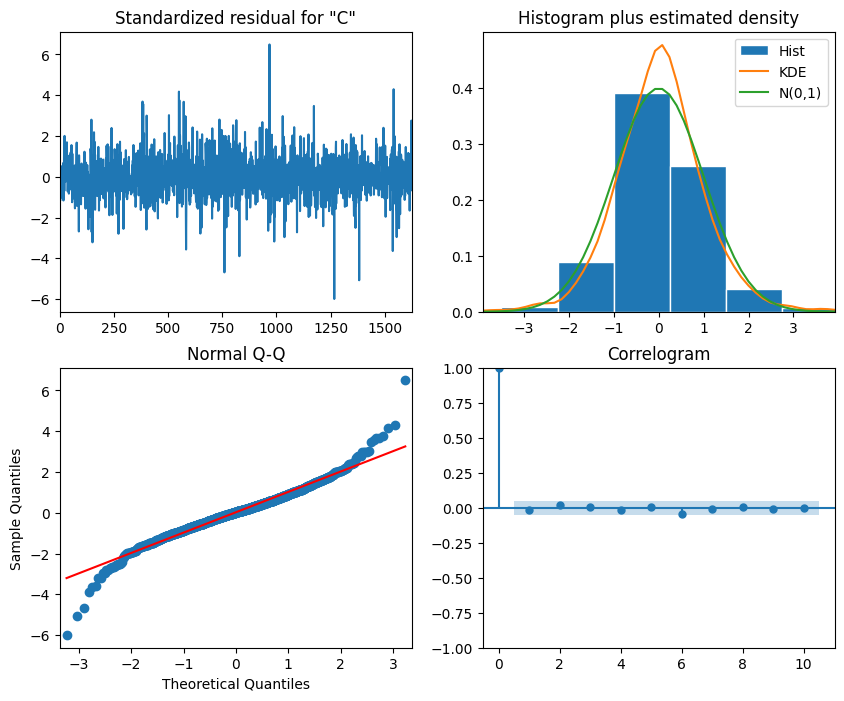

In [ ]:
# Check diagnostics plots (residuals)
arima_model_fit.plot_diagnostics(figsize=(10, 8))
plt.show()

#SARIMA Model:
* Use the SARIMA model to account for seasonality in the time series.


In [ ]:
# Fit a SARIMA(p, d, q)(P, D, Q, s) model
# Adjust p, d, q, P, D, Q, s based on your data and analysis
sarima_model = ARIMA(train_data, order=(5, 1, 5), seasonal_order=(1, 1, 1, 12))
sarima_model_fit = sarima_model.fit()

print("\nSARIMA Model Summary:")
print(sarima_model_fit.summary())


SARIMA Model Summary:
                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1628
Model:             ARIMA(5, 1, 5)x(1, 1, [1], 12)   Log Likelihood               -3863.122
Date:                            Sat, 17 May 2025   AIC                           7752.244
Time:                                    13:43:29   BIC                           7822.277
Sample:                                         0   HQIC                          7778.237
                                           - 1628                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0956      1.157     -0.083      0.934      -2.363       2.172
ar.L2       

In [ ]:
# @title  Identify seasonal parameters (P, D, Q, s) and integrate them with ARIMA parameters
# Let's assume after inspecting plots, we tentatively identify:
# P = 1 (significant spike at lag s in PACF)
# Q = 1 (significant spike at lag s in ACF)
# D = 1 (if seasonal differencing was needed)

# Example seasonal parameters (replace with your findings)
seasonal_P = 1
seasonal_D = 0 # Assume no seasonal differencing needed for this example
seasonal_Q = 1
seasonal_s = 12 # Adjust seasonal period based on your data's frequency
# Example ARIMA parameters based on previous analysis (adjust as needed)
p = 5
d = 1 # From stationarity analysis
q = 5
# Final SARIMA order
sarima_order = (p, d, q)
sarima_seasonal_order = (seasonal_P, seasonal_D, seasonal_Q, seasonal_s)

print(f"\nIdentified ARIMA Order (p, d, q): {sarima_order}")
print(f"Identified Seasonal Order (P, D, Q, s): {sarima_seasonal_order}")


Identified ARIMA Order (p, d, q): (5, 1, 5)
Identified Seasonal Order (P, D, Q, s): (1, 0, 1, 12)


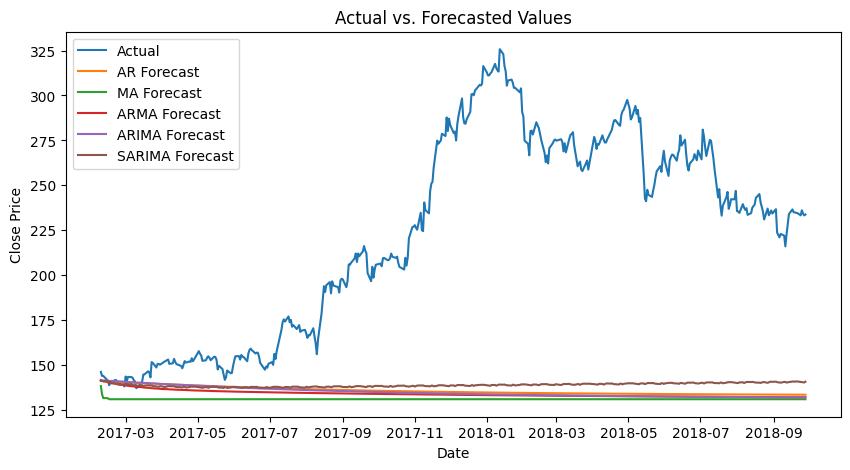

In [ ]:
# Define the forecasting horizon
forecast_horizon = len(test_data)
# Generate forecasts for each model
ar_forecast = ar_model_fit.forecast(steps=forecast_horizon)
ma_forecast = ma_model_fit.forecast(steps=forecast_horizon)
arma_forecast = arma_model_fit.forecast(steps=forecast_horizon)
arima_forecast = arima_model_fit.forecast(steps=forecast_horizon)
sarima_forecast = sarima_model_fit.forecast(steps=forecast_horizon)
# Plot actual vs. predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, ar_forecast, label='AR Forecast')
plt.plot(test_data.index, ma_forecast, label='MA Forecast')
plt.plot(test_data.index, arma_forecast, label='ARMA Forecast')
plt.plot(test_data.index, arima_forecast, label='ARIMA Forecast')
plt.plot(test_data.index, sarima_forecast, label='SARIMA Forecast')
plt.title('Actual vs. Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# 5. Evaluation
* Evaluate the performance of each model using metrics like Mean Absolute Error (MAE), Root Mean Square Error (RMSE), and Mean Absolute Percentage Error, (MAPE).  

In [ ]:
def calculate_mape(y_true, y_pred):
    # Convert to numpy arrays to ensure element-wise operations
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Identify periods where actual value is not zero
    non_zero_indices = y_true != 0

    # Filter both true and predicted values to include only non-zero actuals
    y_true_filtered = y_true[non_zero_indices]
    y_pred_filtered = y_pred[non_zero_indices]

    # If there are no non-zero values, MAPE is undefined or can be set to a specific value (e.g., np.nan or 100)
    if len(y_true_filtered) == 0:
        return np.nan # Or 100, depending on interpretation

    # Calculate percentage errors only for non-zero actual values
    percentage_errors = np.abs((y_true_filtered - y_pred_filtered) / y_true_filtered) * 100

    # Return the mean of the percentage errors
    return np.mean(percentage_errors)

# The rest of your evaluation code remains the same
# ... (List of models, forecasts, calculating metrics, creating table, printing)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Define the MAPE function, potentially updated to handle zeros as shown above
def calculate_mape(y_true, y_pred):
    # ... (Implementation as shown in Fix 1, which also handles NaNs implicitly by filtering)
    # A simpler version focusing only on NaNs would be:
    valid_indices = ~np.isnan(y_true) & ~np.isnan(y_pred)
    y_true_valid = np.array(y_true)[valid_indices]
    y_pred_valid = np.array(y_pred)[valid_indices]

    if len(y_true_valid) == 0:
         return np.nan

    # Handle potential division by zero among valid values if needed (see Fix 1)
    non_zero_indices = y_true_valid != 0
    y_true_filtered = y_true_valid[non_zero_indices]
    y_pred_filtered = y_pred_valid[non_zero_indices]

    if len(y_true_filtered) == 0:
        return np.nan # Or 100

    percentage_errors = np.abs((y_true_filtered - y_pred_filtered) / y_true_filtered) * 100
    return np.mean(percentage_errors)


# List of models and their forecasts
models = ['AR', 'MA', 'ARMA', 'ARIMA', 'SARIMA']
forecasts = [ar_forecast, ma_forecast, arma_forecast, arima_forecast, sarima_forecast]

# Calculate and store metrics
rmse_values = []
mae_values = []
mape_values = []

for forecast in forecasts:
    # Ensure forecast is a numpy array for consistent handling
    forecast = np.array(forecast)
    test_data_np = np.array(test_data)

    # Identify indices where both actual and forecast are NOT NaN
    valid_indices = ~np.isnan(test_data_np) & ~np.isnan(forecast)

    # Filter actual and forecast data to include only valid periods
    test_data_valid = test_data_np[valid_indices]
    forecast_valid = forecast[valid_indices]

    # Only calculate metrics if there are valid data points
    if len(test_data_valid) > 0:
        rmse = np.sqrt(mean_squared_error(test_data_valid, forecast_valid))
        mae = mean_absolute_error(test_data_valid, forecast_valid)
        mape = calculate_mape(test_data_valid, forecast_valid) # Use the potentially modified MAPE function
    else:
        # If no valid data points, metrics are undefined
        rmse = np.nan
        mae = np.nan
        mape = np.nan

    rmse_values.append(rmse)
    mae_values.append(mae)
    mape_values.append(mape)


# Create and print results table
results_table = pd.DataFrame({
    'Model': models,
    'RMSE': rmse_values,
    'MAE': mae_values,
    'MAPE': mape_values
})

print("\nModel Evaluation Results:")
print(results_table)


Model Evaluation Results:
    Model        RMSE        MAE       MAPE
0      AR  104.679831  87.841130  34.809910
1      MA  107.773643  92.507798  37.270984
2    ARMA  105.965179  89.543669  35.659404
3   ARIMA  105.617004  88.674380  35.149247
4  SARIMA  100.803629  84.642119  33.578720
